# [Ref](https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/)

In [ ]:
import pandas as pd

data=pd.read_csv("loadmetro.csv" )

#data

In [ ]:
# Specify the columns you want to keep
columns_to_keep = ['datetime','Load']

# Use indexing to select the desired columns
df = data[columns_to_keep]
# set the 'datetime_column' as the index
#df.set_index('datetime', inplace=True)
df

,datetime,Load
0,2019-03-21 00:00:00,352.862799
1,2019-03-21 01:00:00,330.444853
2,2019-03-21 02:00:00,287.419792
3,2019-03-21 03:00:00,258.110368
4,2019-03-21 04:00:00,247.745866
...,...,...
22003,2021-09-22 19:00:00,632.235500
22004,2021-09-22 20:00:00,612.703162
22005,2021-09-22 21:00:00,589.574385
22006,2021-09-22 22:00:00,561.323968


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

<ipython-input-27-a963c6478daf>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



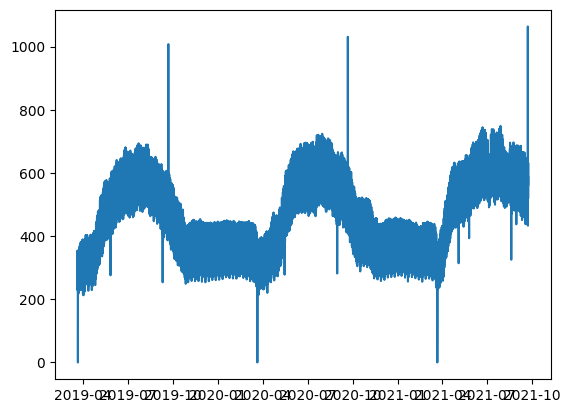

In [ ]:
plt.plot(df['datetime'], df['Load'])

**Find outliers and view the data distribution using a histogram**

In [ ]:

import plotly.express as px

fig = px.histogram(df, x='Load')

fig.show()

**Find outliers in data using a box plot**

In [ ]:
fig = px.box(df, y='Load')

fig.show()

**Finding outliers using statistical methods**

Since the data doesn’t follow a normal distribution, we will calculate the outlier data points using the statistical method called interquartile range (IQR) instead of using Z-score.

In [ ]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
outliers = find_outliers_IQR(df['Load'])

print('number of outliers: '+ str(len(outliers)))

print('“max outlier value: “'+ str(outliers.max()))

print('“min outlier value: “'+ str(outliers.min()))

outliers

number of outliers: 6
“max outlier value: “1063.723392
“min outlier value: “0.0


24          0.000000
4439     1007.891246
8784        0.000000
13199    1031.060894
17568       0.000000
21983    1063.723392
Name: Load, dtype: float64

# [link text](https://)[sktime(Hampfilter)](https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.transformations.series.outlier_detection.HampelFilter.html)

[Imputing Missing Data with Simple and Advanced Techniques(TDS)](https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87)

[Data Imputation Demystified | Time Series Data(TDS)](https://medium.com/@aaabulkhair/data-imputation-demystified-time-series-data-69bc9c798cb7)

In [63]:
import pandas as pd

data=pd.read_csv("loadmetro.csv" )

#data

In [64]:
# Specify the columns you want to keep
columns_to_keep = ['datetime','Load']

# Use indexing to select the desired columns
df = data[columns_to_keep]
df

,datetime,Load
0,2019-03-21 00:00:00,352.862799
1,2019-03-21 01:00:00,330.444853
2,2019-03-21 02:00:00,287.419792
3,2019-03-21 03:00:00,258.110368
4,2019-03-21 04:00:00,247.745866
...,...,...
22003,2021-09-22 19:00:00,632.235500
22004,2021-09-22 20:00:00,612.703162
22005,2021-09-22 21:00:00,589.574385
22006,2021-09-22 22:00:00,561.323968


In [65]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df

<ipython-input-65-a59839575aa9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['datetime'])


,Load
datetime,
2019-03-21 00:00:00,352.862799
2019-03-21 01:00:00,330.444853
2019-03-21 02:00:00,287.419792
2019-03-21 03:00:00,258.110368
2019-03-21 04:00:00,247.745866
...,...
2021-09-22 19:00:00,632.235500
2021-09-22 20:00:00,612.703162
2021-09-22 21:00:00,589.574385


In [4]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 17.3 MB/s eta 0:00:00


In [5]:
import sktime

In [6]:
from sktime.transformations.series.outlier_detection import HampelFilter


In [66]:

y = df

transformer = HampelFilter(window_length=10)

y_hat = transformer.fit_transform(y)

In [56]:
y_hat

,Load
datetime,
2019-03-21 00:00:00,NaN
2019-03-21 01:00:00,NaN
2019-03-21 02:00:00,287.419792
2019-03-21 03:00:00,258.110368
2019-03-21 04:00:00,247.745866
...,...
2021-09-22 19:00:00,632.235500
2021-09-22 20:00:00,612.703162
2021-09-22 21:00:00,589.574385


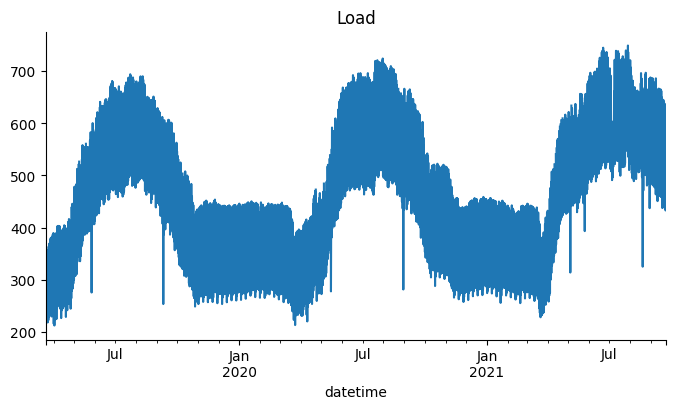

In [10]:
# @title Load

from matplotlib import pyplot as plt
y_hat['Load'].plot(kind='line', figsize=(8, 4), title='Load')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
y_hat.describe()

,Load
count,21811.000000
mean,454.358527
std,125.967261
min,212.709756
25%,349.664892
50%,441.226954
75%,563.815348
max,748.868203


In [41]:

# Check for missing values in each column
missing_values = y_hat.isnull().sum()

# Print the results
missing_values

Load    197
dtype: int64

In [13]:
# Count the number of 0 values in each column
num_zeros = (y_hat == 0).sum()

# Show the number of 0 values in each column
num_zeros

Load    0
dtype: int64

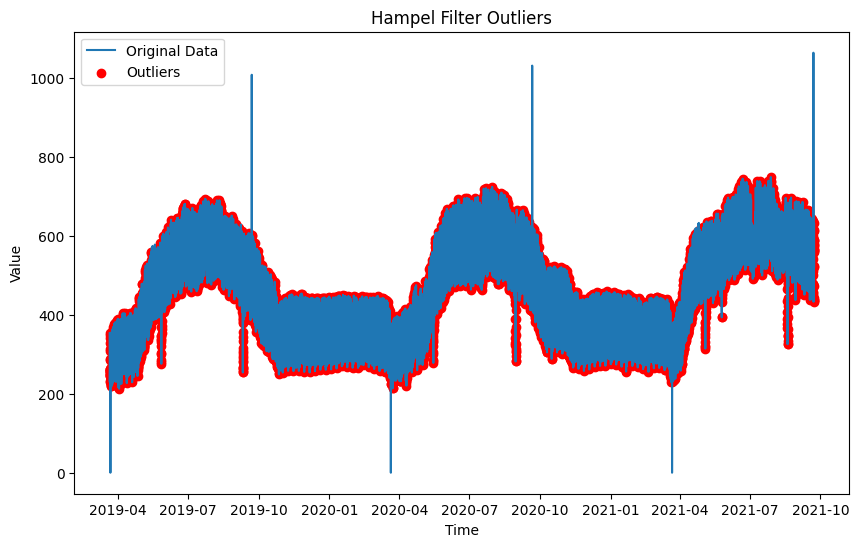

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


outliers = y.iloc[outlier_indices]

# Visualize the outliers
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='Original Data')
plt.scatter(outliers.index, outliers, color='red', label='Outliers')
#plt.scatter(y.index[outlier_indices], outliers, color='red', label='Outliers')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Hampel Filter Outliers')
plt.legend()
plt.show()

## **new data**

In [67]:
dataset = y_hat
dataset

,Load
datetime,
2019-03-21 00:00:00,NaN
2019-03-21 01:00:00,NaN
2019-03-21 02:00:00,287.419792
2019-03-21 03:00:00,258.110368
2019-03-21 04:00:00,247.745866
...,...
2021-09-22 19:00:00,632.235500
2021-09-22 20:00:00,612.703162
2021-09-22 21:00:00,589.574385


In [24]:

import plotly.express as px


fig = px.histogram(dataset, x='Load')

fig.show()

In [25]:
fig = px.box(dataset, y='Load')

fig.show()

In [26]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [27]:
outliers = find_outliers_IQR(dataset['Load'])

print('number of outliers: '+ str(len(outliers)))

print('“max outlier value: “'+ str(outliers.max()))

print('“min outlier value: “'+ str(outliers.min()))

outliers

number of outliers: 0
“max outlier value: “nan
“min outlier value: “nan


Series([], Name: Load, dtype: float64)

<Axes: >

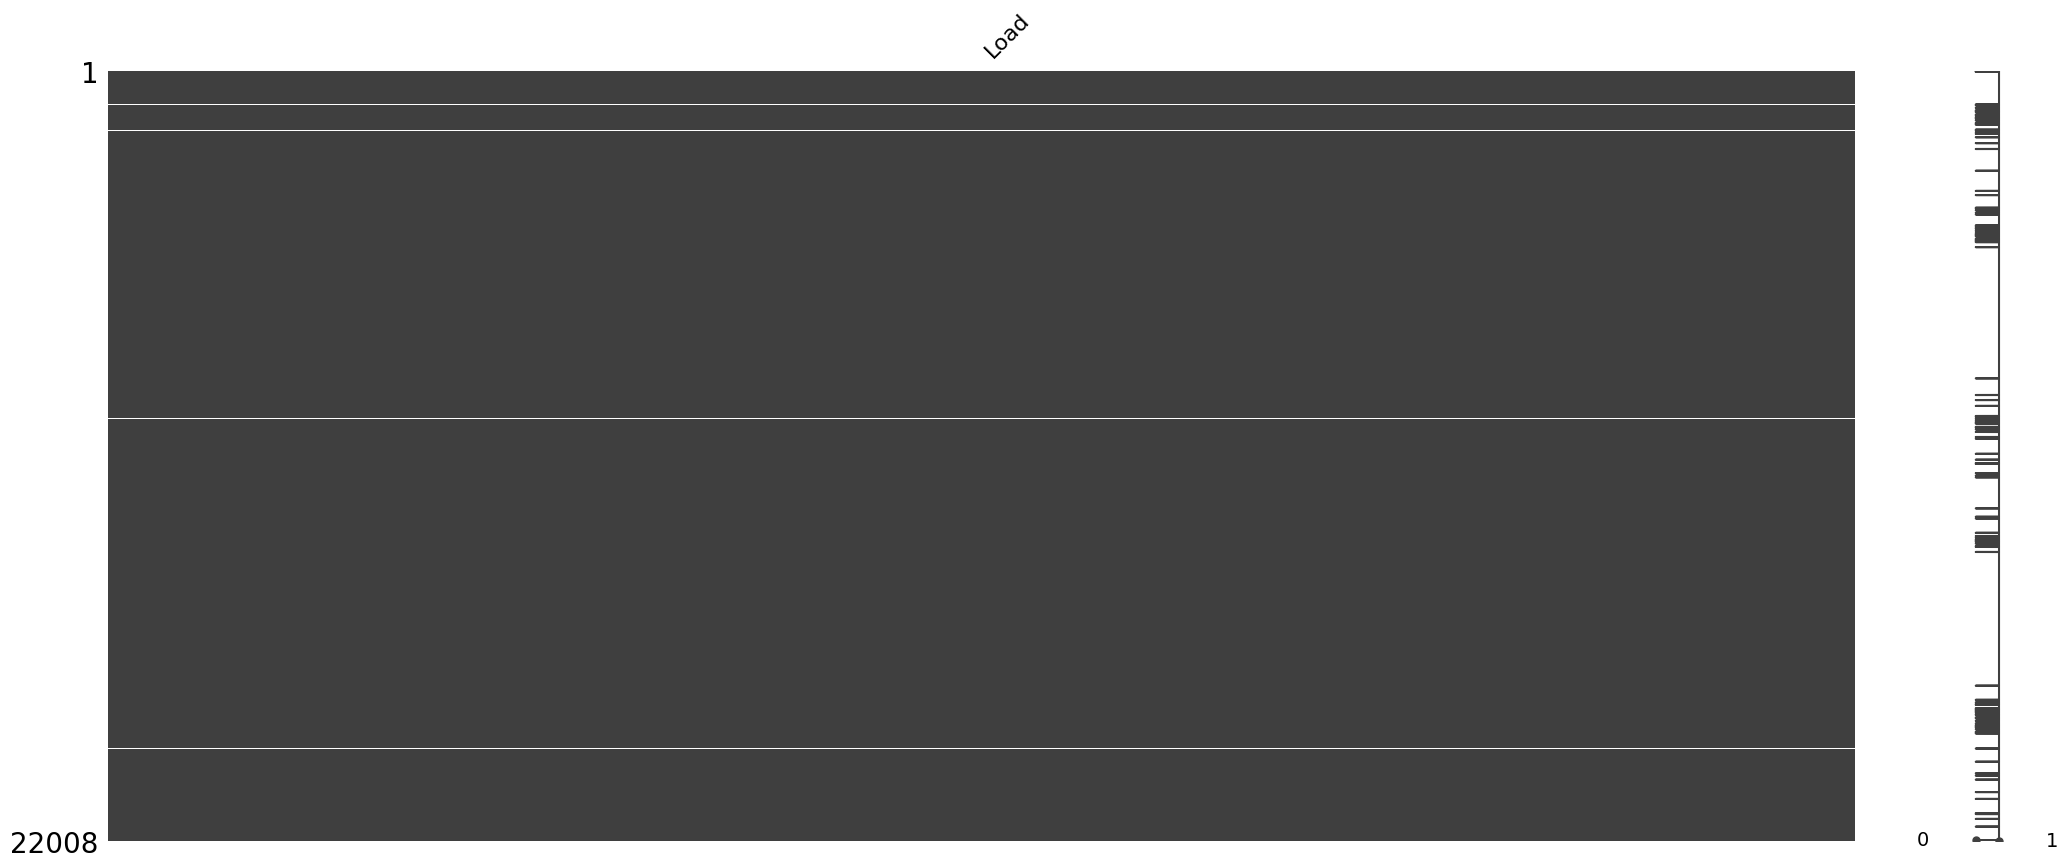

In [28]:
import missingno as msno

msno.matrix(dataset)

In [11]:
import pandas as pd

# Assuming 'y_hat' is your time series data

# Check for missing values in each column
missing_values = y_hat.isnull()

# Get the indices of the missing values
missing_indices = missing_values[missing_values['Load']].index

# Print the locations of the missing values
print("Locations of missing values:")
for index in missing_indices:
    print(index)

Locations of missing values:
2019-03-21 00:00:00
2019-03-21 01:00:00
2019-03-22 00:00:00
2019-04-29 20:00:00
2019-04-29 21:00:00
2019-04-30 20:00:00
2019-04-30 21:00:00
2019-05-03 20:00:00
2019-05-03 21:00:00
2019-05-06 20:00:00
2019-05-06 21:00:00
2019-05-07 20:00:00
2019-05-08 20:00:00
2019-05-11 20:00:00
2019-05-11 21:00:00
2019-05-12 20:00:00
2019-05-12 21:00:00
2019-05-14 20:00:00
2019-05-14 21:00:00
2019-05-15 20:00:00
2019-05-15 21:00:00
2019-05-16 20:00:00
2019-05-16 21:00:00
2019-05-18 20:00:00
2019-05-18 21:00:00
2019-05-21 20:00:00
2019-05-21 21:00:00
2019-05-22 20:00:00
2019-05-22 21:00:00
2019-05-23 20:00:00
2019-05-23 21:00:00
2019-05-29 20:00:00
2019-05-29 21:00:00
2019-05-30 20:00:00
2019-05-30 21:00:00
2019-06-01 20:00:00
2019-06-01 21:00:00
2019-06-03 20:00:00
2019-06-03 21:00:00
2019-06-07 21:00:00
2019-06-14 21:00:00
2019-06-14 22:00:00
2019-06-21 21:00:00
2019-07-17 19:00:00
2019-08-10 19:00:00
2019-08-15 18:00:00
2019-08-15 19:00:00
2019-08-30 20:00:00
2019-08-31 

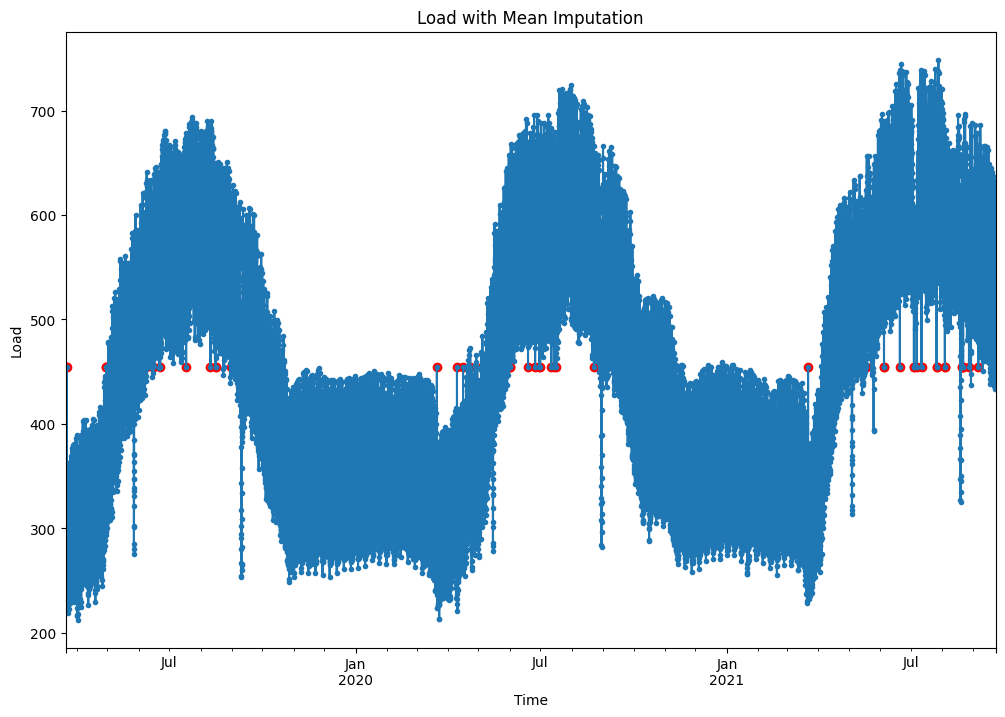

In [68]:
import matplotlib.pyplot as plt



# Apply the mean imputation method
df_imputed = dataset.fillna(dataset['Load'].mean())

# Plot the main line with markers
df_imputed['Load'].plot(style='.-', figsize=(12,8), title='Load with Mean Imputation')

# Add points where data was imputed with red color
imputed_indices = dataset[dataset['Load'].isnull()].index
plt.scatter(imputed_indices, df_imputed.loc[imputed_indices, 'Load'], color='red')

# Set labels
plt.xlabel('Time')
plt.ylabel('Load')

plt.show()

In [44]:

# Check for missing values in each column
missing_values = df_imputed.isnull().sum()

# Print the results
missing_values

Load    0
dtype: int64

In [69]:
df_imputed

,Load
datetime,
2019-03-21 00:00:00,454.358527
2019-03-21 01:00:00,454.358527
2019-03-21 02:00:00,287.419792
2019-03-21 03:00:00,258.110368
2019-03-21 04:00:00,247.745866
...,...
2021-09-22 19:00:00,632.235500
2021-09-22 20:00:00,612.703162
2021-09-22 21:00:00,589.574385


In [ ]:

import pandas as pd

# Assuming you have a pandas DataFrame called 'df' with an index column called 'index_col'
df_imputed['Datetime'] = df_imputed.index  # Create a new column with the index values
df_imputed.reset_index(drop=True, inplace=True)  # Remove the index

#df_imputed


# Assuming you have a pandas DataFrame called 'df'
last_column = df_imputed.columns[-1]  # Get the name of the last column
df = df_imputed[[last_column] + df_imputed.columns[:-1].tolist()]

# The last column is now moved to the first position in the DataFrame
df

In [72]:

# Assuming you have a pandas DataFrame called 'df'
df.to_csv('df_imputed(mean).csv', index=False)